In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
all_f= glob.glob('Rmse*.csv')
all_f

['Rmse_Mape 09-Daily_Sunspot_data-.csv',
 'Rmse_Mape 09-Healthy_control_heart_data-.csv',
 'Rmse_Mape 09-Metro_Interstate_Traffic_Volume_PD-.csv',
 'Rmse_Mape 09-Myocardial_infarction_heart_data-.csv',
 'Rmse_Mape 09-PM2.5_p09_data-.csv',
 'Rmse_Mape 09-POWER_Point_Daily_Presure_Data-.csv',
 'Rmse_Mape 09-POWER_Point_Daily_Temperature_Data-.csv',
 'Rmse_Mape 09-Tetuan_City_Power_Consumption_Zone1_processed-.csv']

In [2]:
li=[]
for file_name in all_f:
    df=pd.read_csv(file_name)
    li.append(df.iloc[:,1:].filter(regex='_Rmse$'))


In [3]:
li[0]

,LSTM-Tred_Rmse,LSTM-GAB_Rmse,CNN-Tred_Rmse,CNN-GAB_Rmse,BiLSTM-Tred_Rmse,BiLSTM-GAB_Rmse,GRU-Tred_Rmse,GRU-GAB_Rmse,RNN-Tred_Rmse,RNN-GAB_Rmse
0,15.224216,14.015745,14.868376,11.100603,16.312057,14.294405,15.895173,13.745801,15.862109,13.884878
1,14.738546,14.045383,14.798545,11.191286,16.533711,14.465996,15.869117,13.902754,16.182661,13.367758
2,15.264385,14.142782,14.823277,11.117926,17.187311,13.328174,15.950240,14.104449,16.001317,13.020467
3,14.802046,13.958891,14.867742,11.136555,17.292683,14.044486,15.975117,14.025973,16.179476,13.989418
4,15.235855,14.002605,14.793313,11.206506,16.424427,14.642772,15.914934,13.923805,16.038589,14.023174
5,15.199485,14.022945,14.868148,11.235394,17.298890,13.469685,14.876246,13.914050,16.296074,13.902451
6,14.863092,13.664189,14.862765,11.254134,16.711335,14.589409,16.065730,14.315743,15.836442,13.997789
7,14.716458,14.353564,14.870985,11.251421,17.130414,13.503102,15.956473,14.272356,16.043494,14.122729
8,14.726941,14.422862,15.150411,11.230456,16.323535,14.896733,15.592578,14.274140,16.145961,13.969601


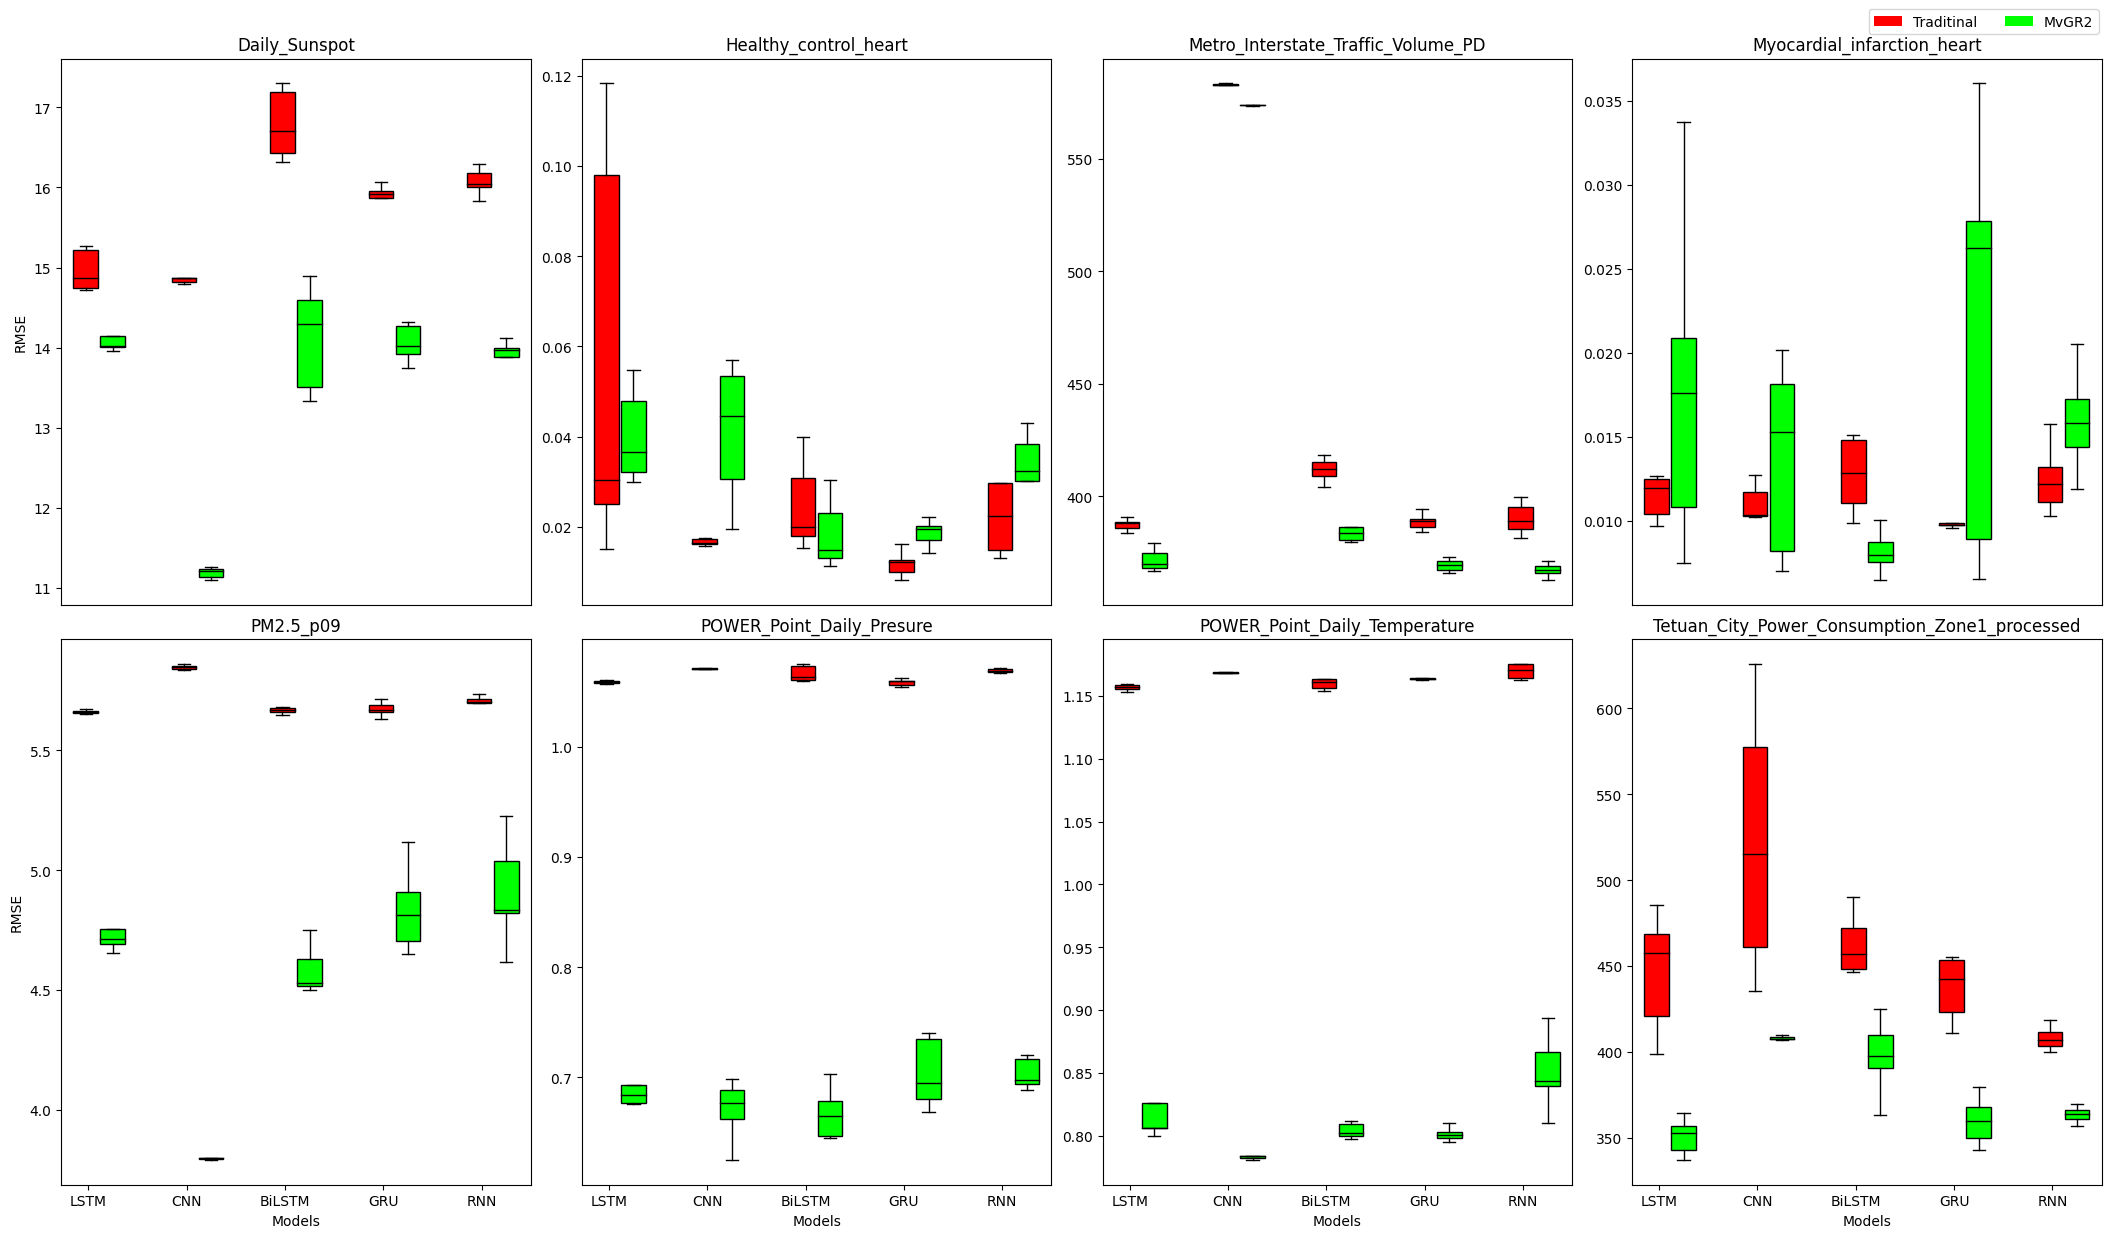

In [4]:
fig, axs = plt.subplots(2,4, figsize=(21, 12), layout='constrained')
handles, labels = None, None # Initialize handles and labels
d=0
dd0 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd1 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
ticks=[]
def set_box_color(bp, color,facecolor, edgecolor):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    for box in bp['boxes']:
        box.set(facecolor=facecolor, edgecolor=edgecolor)
b0=axs[0,0].boxplot(dd0, positions=np.array(range(len(dd0))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b1=axs[0,0].boxplot(dd1, positions=np.array(range(len(dd1))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
##set_box_color(b0, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b1, '#2C7BB6')
# Custom fill colors for each box
axs[0,0].set_title(all_f[d].split(r'-')[1].split('_data')[0])

for d in range(5):
    b0['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b1['boxes'][d].set(facecolor='#00FF00') 
    b0['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b1['medians'][d].set(color='#000000')  
axs[0,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
axs[0,0].set_ylabel('RMSE')


d=1
dd2 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd3 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b2=axs[0,1].boxplot(dd2, positions=np.array(range(len(dd2))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b3=axs[0,1].boxplot(dd3, positions=np.array(range(len(dd3))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
##set_box_color(b2, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b3, '#2C7BB6')
axs[0,1].set_title(all_f[d].split(r'-')[1].split('_data')[0])
for d in range(5):
    b2['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b3['boxes'][d].set(facecolor='#00FF00')
    b2['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b3['medians'][d].set(color='#000000')  
axs[0,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)


d=2
dd4 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd5 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b4=axs[0,2].boxplot(dd4, positions=np.array(range(len(dd4))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b5=axs[0,2].boxplot(dd5, positions=np.array(range(len(dd5))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
#set_box_color(b4, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b5, '#2C7BB6')
axs[0,2].set_title(all_f[d].split(r'-')[1].split('_data')[0])
for d in range(5):
    b4['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b5['boxes'][d].set(facecolor='#00FF00') 
    b4['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b5['medians'][d].set(color='#000000')  
axs[0,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)

d=3
dd6 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd7 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b6=axs[0,3].boxplot(dd6, positions=np.array(range(len(dd6))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b7=axs[0,3].boxplot(dd7, positions=np.array(range(len(dd7))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
#set_box_color(b6, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b7, '#2C7BB6')
axs[0,3].set_title(all_f[d].split(r'-')[1].split('_data')[0])
for d in range(5):
    b6['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b7['boxes'][d].set(facecolor='#00FF00') 
    b6['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b7['medians'][d].set(color='#000000')  
axs[0,3].set_xticks(range(0, len(ticks) * 2, 2), ticks)





d=4
ticks = ['LSTM','CNN','BiLSTM','GRU','RNN']
dd8 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd9 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b8=axs[1,0].boxplot(dd8, positions=np.array(range(len(dd8))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b9=axs[1,0].boxplot(dd9, positions=np.array(range(len(dd9))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)

#set_box_color(b8, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b9, '#2C7BB6')
axs[1,0].set_title(all_f[d].split(r'-')[1].split('_data')[0])
for d in range(5):
    b8['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b9['boxes'][d].set(facecolor='#00FF00') 
    b8['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b9['medians'][d].set(color='#000000')  
axs[1,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
axs[1,0].set_ylabel('RMSE')
axs[1,0].set_xlabel('Models')

d=5
dd10 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd11 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b10=axs[1,1].boxplot(dd10, positions=np.array(range(len(dd10))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b11=axs[1,1].boxplot(dd11, positions=np.array(range(len(dd11))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
#set_box_color(b10, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b11, '#2C7BB6')
axs[1,1].set_title(all_f[d].split(r'-')[1].split('_Data')[0])
for d in range(5):
    b10['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b11['boxes'][d].set(facecolor='#00FF00') 
    b10['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b11['medians'][d].set(color='#000000')  
axs[1,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
axs[1,1].set_xlabel('Models')

d=6
dd12 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd13 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b12=axs[1,2].boxplot(dd12, positions=np.array(range(len(dd12))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b13=axs[1,2].boxplot(dd13, positions=np.array(range(len(dd13))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
#set_box_color(b12, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b13, '#2C7BB6')
axs[1,2].set_title(all_f[d].split(r'-')[1].split('_Data')[0])
for d in range(5):
    b12['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b13['boxes'][d].set(facecolor='#00FF00') 
    b12['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b13['medians'][d].set(color='#000000')  

axs[1,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
axs[1,2].set_xlabel('Models')


d=7
dd14 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd15 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b14=axs[1,3].boxplot(dd14, positions=np.array(range(len(dd14))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b15=axs[1,3].boxplot(dd15, positions=np.array(range(len(dd15))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
#set_box_color(b14, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b15, '#2C7BB6')
axs[1,3].set_title(all_f[d].split(r'-')[1].split('_data')[0])
for d in range(5):
    b14['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b15['boxes'][d].set(facecolor='#00FF00') 
    b14['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b15['medians'][d].set(color='#000000')  
#axs[1,3].set_facecolor('#D7191C')
axs[1,3].set_xticks(range(0, len(ticks) * 2, 2), ticks)
axs[1,3].set_xlabel('Models')
#axs[1,3].legend()
#axs.legend().set_visible(False)
#handles, labels = axs.get_legend_handles_labels()
#fig.legend(handles, labels, ncol=5, bbox_to_anchor=(1, 1.01), fontsize=12, fancybox=True, framealpha=1)
# Create legend handles and labels
legend_handles = [plt.Rectangle((0,0), 1, 1, fc='#FF0000'), plt.Rectangle((0,0), 1, 1, fc='#00FF00')]
legend_labels = ['Traditinal', 'MvGR2']

# Display the legend
fig.legend(legend_handles, legend_labels, loc='upper right', ncol=2,bbox_to_anchor=(1, 1.025))
plt.savefig('Box_plot-RMSE',dpi=400,bbox_inches ="tight",pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape')

In [5]:
li=[]
for file_name in all_f:
    df=pd.read_csv(file_name)
    li.append(df.iloc[:,1:].filter(regex='_MAPE$'))

In [6]:
li[0]

,LSTM-Tred_MAPE,LSTM-GAB_MAPE,CNN-Tred_MAPE,CNN-GAB_MAPE,BiLSTM-Tred_MAPE,BiLSTM-GAB_MAPE,GRU-Tred_MAPE,GRU-GAB_MAPE,RNN-Tred_MAPE,RNN-GAB_MAPE
0,32.591657,32.087888,109.436364,26.428493,87.491943,31.965611,33.418851,28.136429,35.234135,31.240640
1,34.545656,31.609146,232.482654,26.141370,81.420856,38.356967,33.207413,30.486660,35.705791,28.460308
2,32.964588,31.365878,161.948363,26.267237,165.462784,47.262006,33.712702,30.719655,35.374407,27.975160
3,34.171138,31.658951,155.013478,26.056664,197.223932,34.632756,33.084569,30.962908,36.457853,33.146258
4,32.711394,30.869439,125.895786,26.030778,73.058723,193.770717,33.413457,31.717581,34.725453,33.298415
5,32.952551,32.466656,203.638106,26.098384,167.868362,59.549985,33.906394,32.301533,34.152862,32.396619
6,33.607678,30.666752,238.997214,26.098031,92.517677,69.561412,33.787970,31.740327,35.569315,35.188692
7,35.275507,31.425065,147.855291,26.164614,197.832194,40.340378,33.892234,32.134759,34.612374,33.609618
8,34.176262,30.870819,500.126375,26.062620,103.193556,918.905741,33.029847,32.049036,34.768523,35.951134


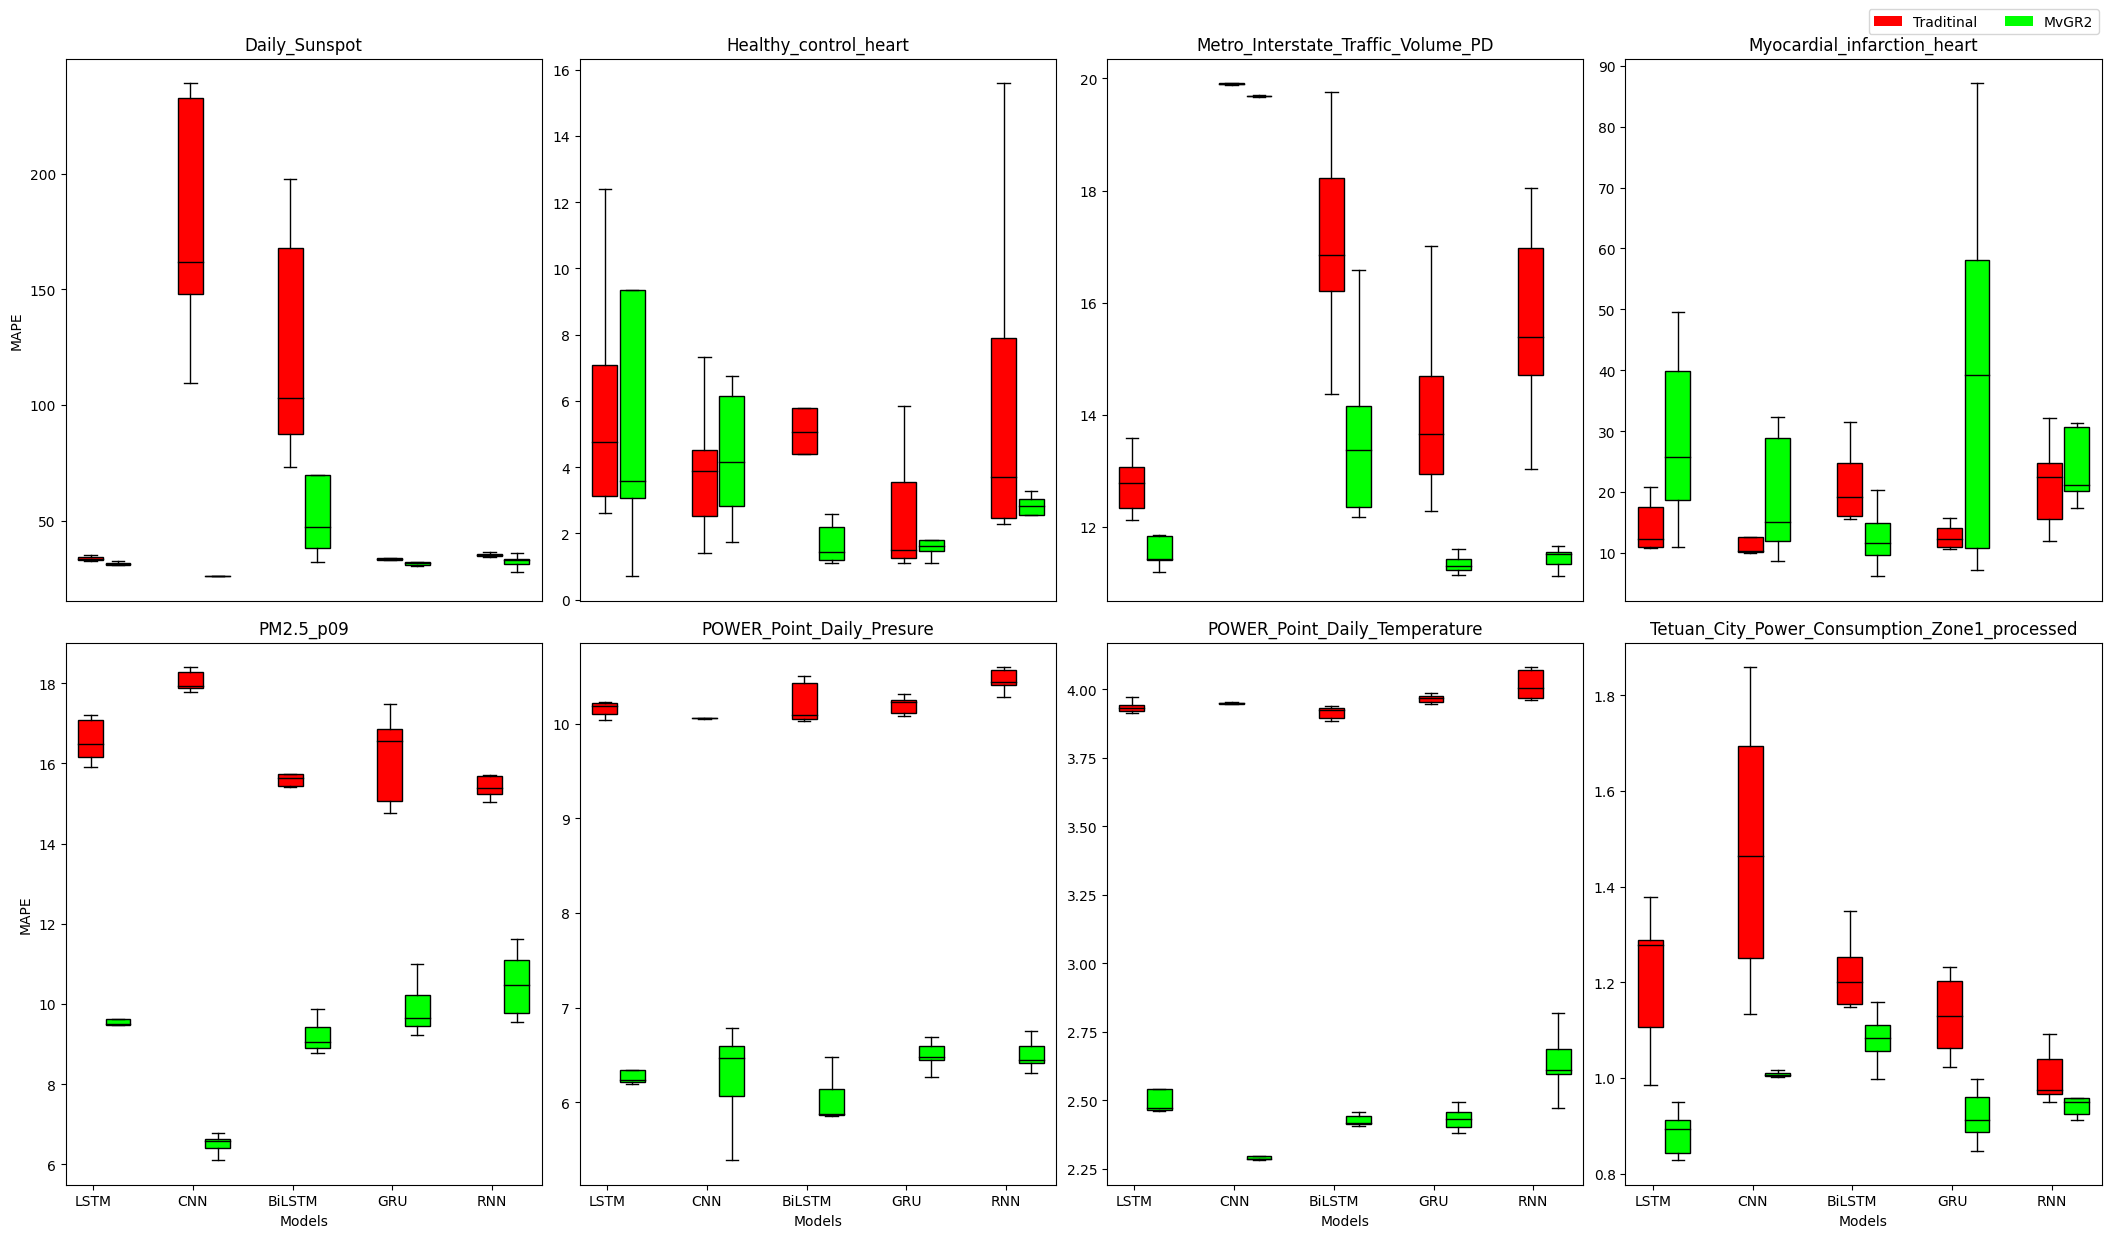

In [7]:
fig, axs = plt.subplots(2,4, figsize=(21, 12), layout='constrained')
handles, labels = None, None # Initialize handles and labels
d=0
dd0 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd1 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
ticks=[]
def set_box_color(bp, color,facecolor, edgecolor):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    for box in bp['boxes']:
        box.set(facecolor=facecolor, edgecolor=edgecolor)
b0=axs[0,0].boxplot(dd0, positions=np.array(range(len(dd0))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b1=axs[0,0].boxplot(dd1, positions=np.array(range(len(dd1))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
##set_box_color(b0, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b1, '#2C7BB6')
# Custom fill colors for each box
axs[0,0].set_title(all_f[d].split(r'-')[1].split('_data')[0])

for d in range(5):
    b0['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b1['boxes'][d].set(facecolor='#00FF00') 
    b0['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b1['medians'][d].set(color='#000000')  
axs[0,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
axs[0,0].set_ylabel('MAPE')


d=1
dd2 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd3 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b2=axs[0,1].boxplot(dd2, positions=np.array(range(len(dd2))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b3=axs[0,1].boxplot(dd3, positions=np.array(range(len(dd3))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
##set_box_color(b2, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b3, '#2C7BB6')
axs[0,1].set_title(all_f[d].split(r'-')[1].split('_data')[0])
for d in range(5):
    b2['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b3['boxes'][d].set(facecolor='#00FF00')
    b2['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b3['medians'][d].set(color='#000000')  
axs[0,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)


d=2
dd4 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd5 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b4=axs[0,2].boxplot(dd4, positions=np.array(range(len(dd4))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b5=axs[0,2].boxplot(dd5, positions=np.array(range(len(dd5))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
#set_box_color(b4, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b5, '#2C7BB6')
axs[0,2].set_title(all_f[d].split(r'-')[1].split('_data')[0])
for d in range(5):
    b4['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b5['boxes'][d].set(facecolor='#00FF00') 
    b4['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b5['medians'][d].set(color='#000000')  
axs[0,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)

d=3
dd6 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd7 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b6=axs[0,3].boxplot(dd6, positions=np.array(range(len(dd6))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b7=axs[0,3].boxplot(dd7, positions=np.array(range(len(dd7))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
#set_box_color(b6, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b7, '#2C7BB6')
axs[0,3].set_title(all_f[d].split(r'-')[1].split('_data')[0])
for d in range(5):
    b6['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b7['boxes'][d].set(facecolor='#00FF00') 
    b6['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b7['medians'][d].set(color='#000000')  
axs[0,3].set_xticks(range(0, len(ticks) * 2, 2), ticks)





d=4
ticks = ['LSTM','CNN','BiLSTM','GRU','RNN']
dd8 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd9 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b8=axs[1,0].boxplot(dd8, positions=np.array(range(len(dd8))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b9=axs[1,0].boxplot(dd9, positions=np.array(range(len(dd9))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)

#set_box_color(b8, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b9, '#2C7BB6')
axs[1,0].set_title(all_f[d].split(r'-')[1].split('_data')[0])
for d in range(5):
    b8['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b9['boxes'][d].set(facecolor='#00FF00') 
    b8['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b9['medians'][d].set(color='#000000')  
axs[1,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
axs[1,0].set_ylabel('MAPE')
axs[1,0].set_xlabel('Models')

d=5
dd10 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd11 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b10=axs[1,1].boxplot(dd10, positions=np.array(range(len(dd10))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b11=axs[1,1].boxplot(dd11, positions=np.array(range(len(dd11))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
#set_box_color(b10, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b11, '#2C7BB6')
axs[1,1].set_title(all_f[d].split(r'-')[1].split('_Data')[0])
for d in range(5):
    b10['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b11['boxes'][d].set(facecolor='#00FF00') 
    b10['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b11['medians'][d].set(color='#000000')  
axs[1,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
axs[1,1].set_xlabel('Models')

d=6
dd12 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd13 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b12=axs[1,2].boxplot(dd12, positions=np.array(range(len(dd12))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b13=axs[1,2].boxplot(dd13, positions=np.array(range(len(dd13))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
#set_box_color(b12, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b13, '#2C7BB6')
axs[1,2].set_title(all_f[d].split(r'-')[1].split('_Data')[0])
for d in range(5):
    b12['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b13['boxes'][d].set(facecolor='#00FF00') 
    b12['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b13['medians'][d].set(color='#000000')  

axs[1,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
axs[1,2].set_xlabel('Models')


d=7
dd14 = [li[d].iloc[:, 0].values, li[d].iloc[:, 2].values, li[d].iloc[:, 4].values, li[d].iloc[:, 6].values, li[d].iloc[:, 8].values]
dd15 = [li[d].iloc[:, 1].values, li[d].iloc[:, 3].values, li[d].iloc[:, 5].values, li[d].iloc[:, 7].values, li[d].iloc[:, 9].values]
b14=axs[1,3].boxplot(dd14, positions=np.array(range(len(dd14))) * 2.0 -.05, sym='', widths=0.5,patch_artist=True)
b15=axs[1,3].boxplot(dd15, positions=np.array(range(len(dd15))) * 2.0 +.5, sym='', widths=0.5,patch_artist=True)
#set_box_color(b14, '#D7191C')  # colors are from http://colorbrewer2.org/
#set_box_color(b15, '#2C7BB6')
axs[1,3].set_title(all_f[d].split(r'-')[1].split('_data')[0])
for d in range(5):
    b14['boxes'][d].set(facecolor='#FF0000')  # Set the fill color for the first box in the first boxplot
    b15['boxes'][d].set(facecolor='#00FF00') 
    b14['medians'][d].set(color='#000000')  # Set the color for the medians in the first boxplot
    b15['medians'][d].set(color='#000000')  
#axs[1,3].set_facecolor('#D7191C')
axs[1,3].set_xticks(range(0, len(ticks) * 2, 2), ticks)
axs[1,3].set_xlabel('Models')
#axs[1,3].legend()
#axs.legend().set_visible(False)
#handles, labels = axs.get_legend_handles_labels()
#fig.legend(handles, labels, ncol=5, bbox_to_anchor=(1, 1.01), fontsize=12, fancybox=True, framealpha=1)
# Create legend handles and labels
legend_handles = [plt.Rectangle((0,0), 1, 1, fc='#FF0000'), plt.Rectangle((0,0), 1, 1, fc='#00FF00')]
legend_labels = ['Traditinal', 'MvGR2']

# Display the legend
fig.legend(legend_handles, legend_labels, loc='upper right', ncol=2,bbox_to_anchor=(1, 1.025))
plt.savefig('Box_plot-Mape',dpi=400,bbox_inches ="tight",pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape')